<a href="https://colab.research.google.com/github/Segrey372017/cities_stat/blob/main/city_stat2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dill
sns.set()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
from lightgbm import LGBMRegressor

# Загрузка и очистка данных

In [4]:
!wget -O /content/cities_stat2020.xlsx https://github.com/Segrey372017/cities_stat/raw/main/cities_stat2020.xlsx

--2022-08-11 10:38:32--  https://github.com/Segrey372017/cities_stat/raw/main/cities_stat2020.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Segrey372017/cities_stat/main/cities_stat2020.xlsx [following]
--2022-08-11 10:38:33--  https://raw.githubusercontent.com/Segrey372017/cities_stat/main/cities_stat2020.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16195 (16K) [application/octet-stream]
Saving to: ‘/content/cities_stat2020.xlsx’

/content/cities_sta 100%[===================>]  15.82K  --.-KB/s    in 0.001s  

2022-08-11 10:38:33 (11.8 MB/s) - ‘/content/cities_stat2020.xlsx’ sa

In [5]:
df = pd.read_excel('/content/cities_stat2020.xlsx')

In [6]:
df.head()

,Регион,Муниципалитет,ССЧ_чел,СредняяЗарплата_руб,Отгрузка_млн_руб,ОборотТорговли_млн_руб,БюджетРасходы_млн_руб,Инвестиции_млн_руб
0,Ивановская,Вичуга,4644,24362.5,1569.9801,1938.6381,728.6035,204.065
1,Ивановская,Кинешма,12075,27299.0,7772.1423,4852.5725,1977.6431,995.331
2,Ивановская,Кохма,2733,27163.4,2937.9856,1700.0135,630.7619,467.665
3,Ивановская,Тейково,5395,27988.7,6710.2328,2309.6860,758.5690,275.265
4,Ивановская,Шуя,9402,30067.4,24950.8141,4104.0293,1188.5295,863.467


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Регион                  68 non-null     object 
 1   Муниципалитет           68 non-null     object 
 2   ССЧ_чел                 68 non-null     int64  
 3   СредняяЗарплата_руб     68 non-null     float64
 4   Отгрузка_млн_руб        68 non-null     float64
 5   ОборотТорговли_млн_руб  68 non-null     float64
 6   БюджетРасходы_млн_руб   68 non-null     float64
 7   Инвестиции_млн_руб      62 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 4.4+ KB


In [8]:
df.describe()

,ССЧ_чел,СредняяЗарплата_руб,Отгрузка_млн_руб,ОборотТорговли_млн_руб,БюджетРасходы_млн_руб,Инвестиции_млн_руб
count,68.000000,68.000000,68.000000,68.000000,68.000000,62.000000
mean,12877.779412,34517.510294,34688.180706,5078.557775,1844.546884,3447.620306
std,12032.665673,7686.802720,51781.509944,5591.837927,1713.315022,6175.213816
min,1866.000000,24362.500000,407.070500,553.083000,261.684100,39.935000
25%,5075.500000,29316.375000,5387.134600,1682.883550,803.925175,442.624000
50%,8491.500000,32270.000000,10926.647150,3447.332550,1312.376500,929.399000
75%,15054.750000,37180.325000,42147.839225,5900.468300,2335.706750,3465.825250
max,64793.000000,59152.200000,281343.335800,29349.209800,9611.746800,30692.197000


In [9]:
df['Инвестиции_млн_руб'].isna().mean()

0.08823529411764706

In [10]:
data = df.dropna()

In [11]:
data.describe()

,ССЧ_чел,СредняяЗарплата_руб,Отгрузка_млн_руб,ОборотТорговли_млн_руб,БюджетРасходы_млн_руб,Инвестиции_млн_руб
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,13351.790323,35038.895161,37510.892663,5300.632085,1926.572945,3447.620306
std,12388.285559,7830.097138,53411.919604,5785.758868,1765.144669,6175.213816
min,1866.000000,24362.500000,407.070500,553.083000,261.684100,39.935000
25%,5205.000000,29491.550000,5622.500225,1665.874850,847.434450,442.624000
50%,9221.500000,33238.100000,13982.416700,3536.448500,1376.070450,929.399000
75%,15484.250000,38003.600000,44577.123875,6075.683900,2451.699650,3465.825250
max,64793.000000,59152.200000,281343.335800,29349.209800,9611.746800,30692.197000


In [12]:
data.columns

Index(['Регион', 'Муниципалитет', 'ССЧ_чел', 'СредняяЗарплата_руб',
       'Отгрузка_млн_руб', 'ОборотТорговли_млн_руб', 'БюджетРасходы_млн_руб',
       'Инвестиции_млн_руб'],
      dtype='object')

In [13]:
col_names = ['Region', 'City', 'WorkCount', 'AvgSalary',
       'Production', 'Retail', 'BudgetSpends',
       'Investment']

In [14]:
data.columns = col_names
data.head()

,Region,City,WorkCount,AvgSalary,Production,Retail,BudgetSpends,Investment
0,Ивановская,Вичуга,4644,24362.5,1569.9801,1938.6381,728.6035,204.065
1,Ивановская,Кинешма,12075,27299.0,7772.1423,4852.5725,1977.6431,995.331
2,Ивановская,Кохма,2733,27163.4,2937.9856,1700.0135,630.7619,467.665
3,Ивановская,Тейково,5395,27988.7,6710.2328,2309.6860,758.5690,275.265
4,Ивановская,Шуя,9402,30067.4,24950.8141,4104.0293,1188.5295,863.467


In [15]:
target_col = 'Investment'

In [16]:
feature_cols = ['WorkCount', 'AvgSalary', 'Production', 'Retail', 'BudgetSpends']

# Разведочный анализ данных

### Распределение целевой величины (Investment)

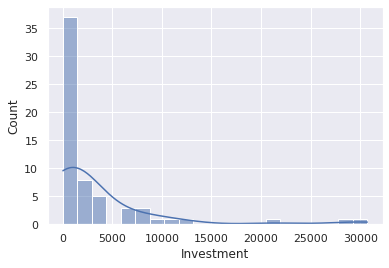

In [17]:
sns.histplot(data.Investment, kde = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


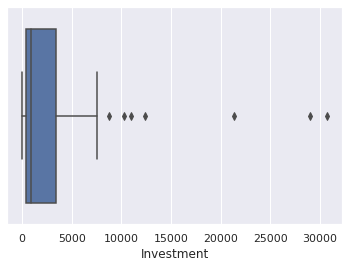

In [18]:
sns.boxplot(data.Investment)

In [19]:
data.Investment.describe()

count       62.000000
mean      3447.620306
std       6175.213816
min         39.935000
25%        442.624000
50%        929.399000
75%       3465.825250
max      30692.197000
Name: Investment, dtype: float64

invesment vs WorkCount


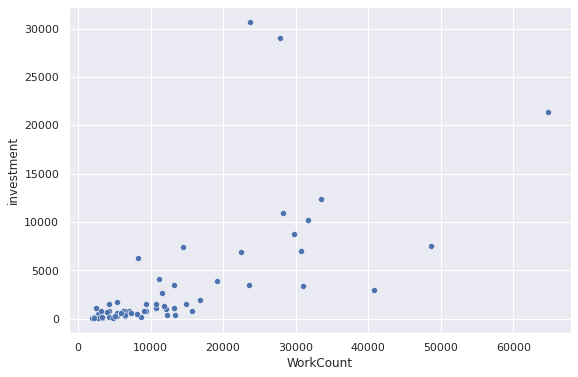

invesment vs AvgSalary


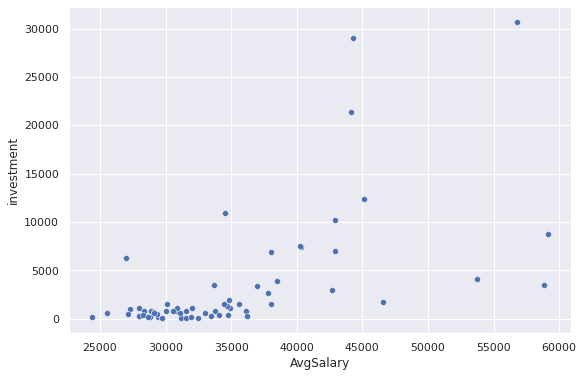

invesment vs Production


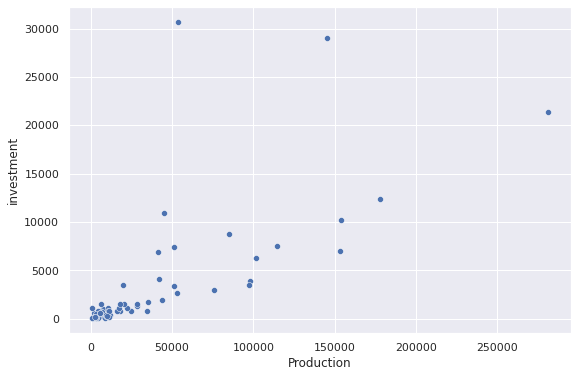

invesment vs Retail


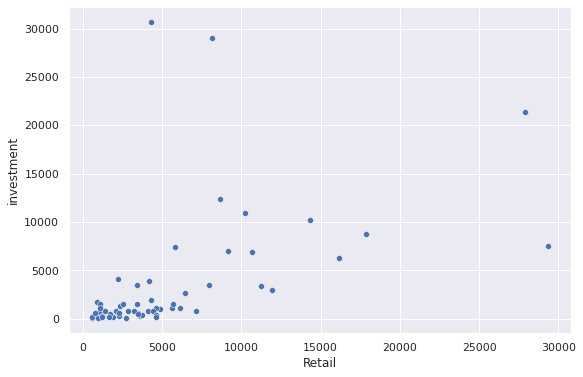

invesment vs BudgetSpends


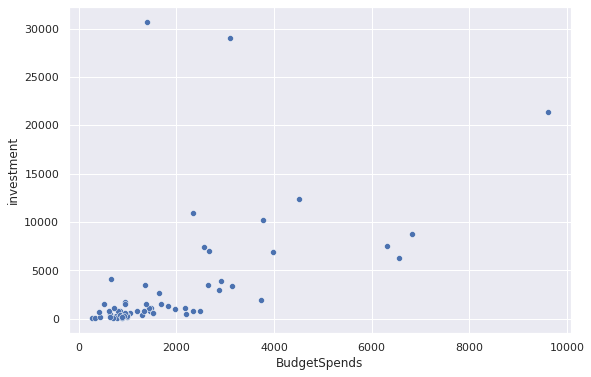

In [20]:
for feat in feature_cols:
    print(f"invesment vs {feat}")
    plt.figure(figsize = (9,6))
    sns.scatterplot(x = data[feat], y = data.Investment)
    plt.xlabel(feat)
    plt.ylabel('investment')
    plt.show()

### Распределение признаков

In [21]:
# описательная статистика для признаков
data[feature_cols].describe()

,WorkCount,AvgSalary,Production,Retail,BudgetSpends
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,13351.790323,35038.895161,37510.892663,5300.632085,1926.572945
std,12388.285559,7830.097138,53411.919604,5785.758868,1765.144669
min,1866.000000,24362.500000,407.070500,553.083000,261.684100
25%,5205.000000,29491.550000,5622.500225,1665.874850,847.434450
50%,9221.500000,33238.100000,13982.416700,3536.448500,1376.070450
75%,15484.250000,38003.600000,44577.123875,6075.683900,2451.699650
max,64793.000000,59152.200000,281343.335800,29349.209800,9611.746800


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

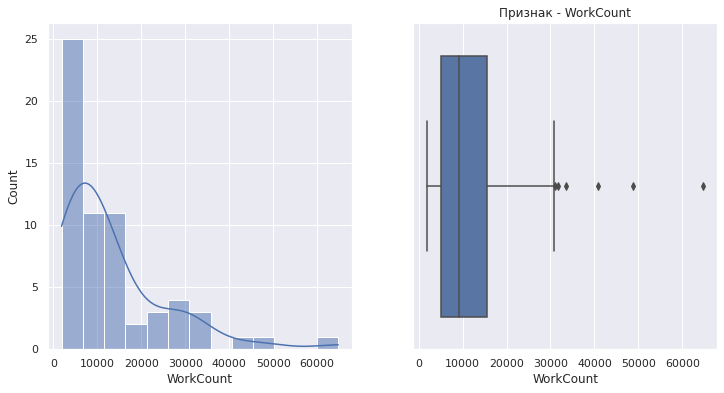

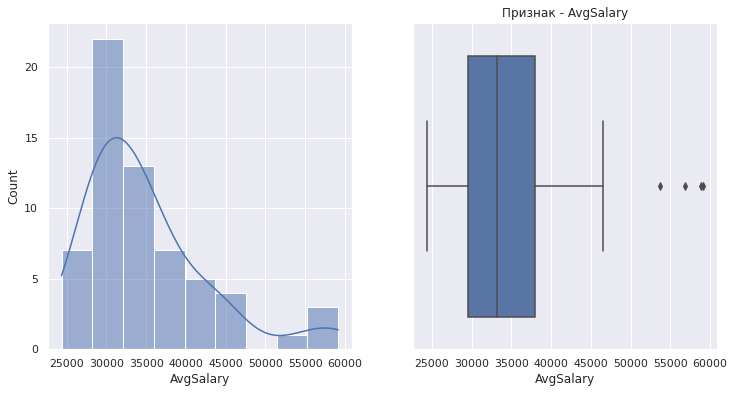

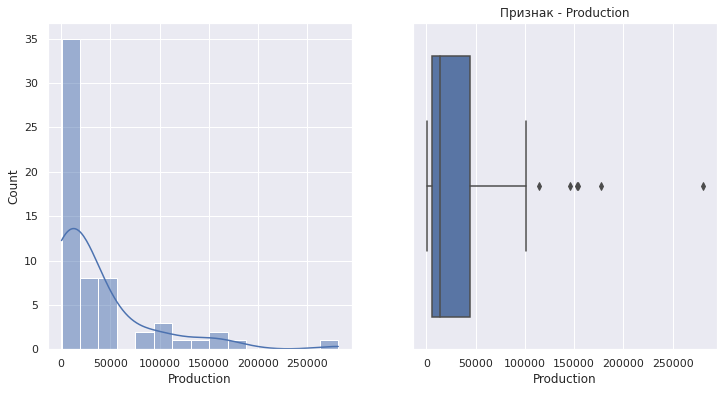

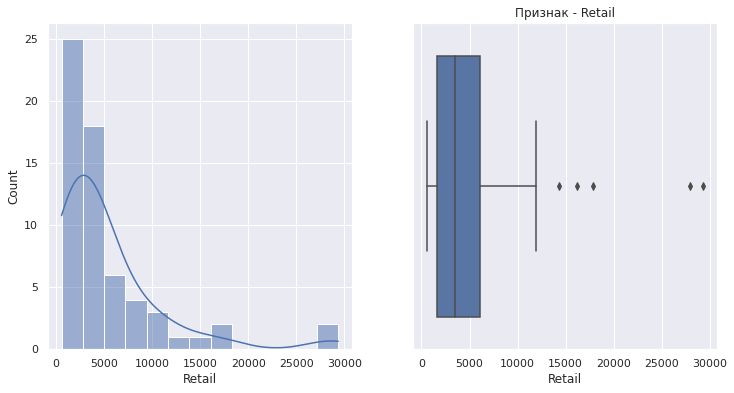

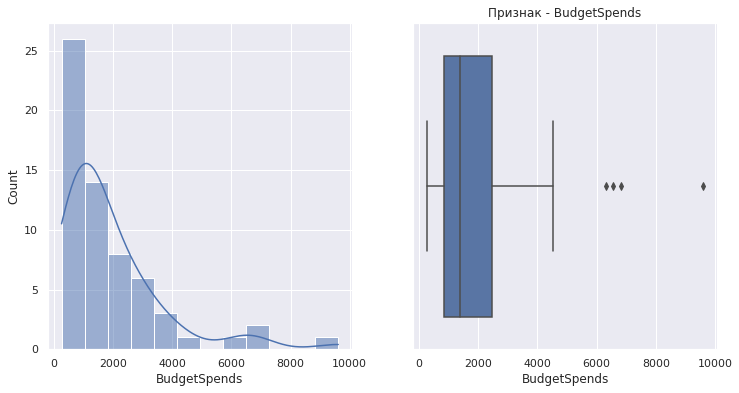

In [22]:
for feat in feature_cols:
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
    plt.title(f'Признак - {feat}')
    sns.histplot(data[feat], kde = True, ax = ax1)
    sns.boxplot(data[feat], ax = ax2)

### Матрица корреляций

In [23]:
corr_mat = data[[*feature_cols, target_col]].corr()

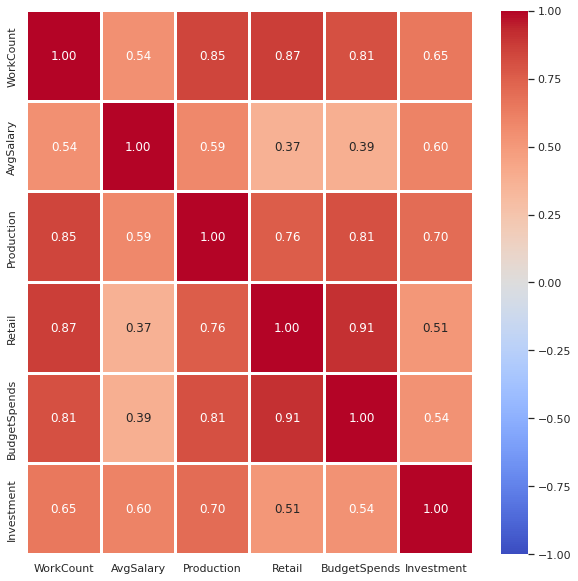

In [24]:
plt.figure(figsize = (10,10))
sns.heatmap(data = corr_mat, vmin= -1, vmax = 1, 
            cmap ='coolwarm', annot = True, fmt = "0.2f",
            linewidths = 2)

# Подготовка датасета

In [260]:
X = data[feature_cols]
y = data[target_col]

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 12)

In [262]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((55, 5), (55,), (7, 5), (7,))

In [263]:
class DataPreparator:
    def __init__(self):
        self.dstat = None
        return

    def fit(self, data):
        """
        Вычисление базовых статистик набора данных для 
        очистки и устранения аномалий
    
        """
        self.dstat = data.describe()
        return

    def transform(self, data):
        """
        Преобразование набора данных: 
        - Заполнение отсутствующих значений медианными;
        - Замена выбросов медианными значениями;
        Возвращает объект DataFrame
        """
        for col in data.columns: # замена пропусков мединанными значениям
            data[col].loc[data[col] == data[col].isna()] = self.dstat[col].loc['50%']

        for col in data.columns:
            med = self.dstat[col].loc['50%']
            whis = med + 6*(self.dstat[col].loc['75%'] - self.dstat[col].loc['25%']) 
            data[col].loc[data[col] > whis] = self.dstat[col].loc['50%']

        return data

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)


In [264]:
prep = DataPreparator()

In [265]:
X_train = prep.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [266]:
X_test = prep.transform(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [267]:
X_train.head()

,WorkCount,AvgSalary,Production,Retail,BudgetSpends
51,9054,31536.5,11105.4039,3227.3556,1334.6840
23,1866,31591.1,8516.3981,553.0830,261.6841
61,5930,33022.5,5545.7681,762.2147,949.7664
24,10799,27948.6,10747.8904,5659.9845,1433.7492
21,16877,34871.9,43486.9805,4311.9476,3732.9356


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

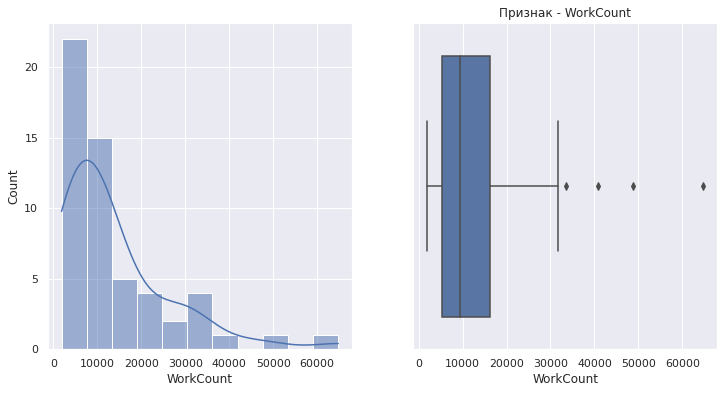

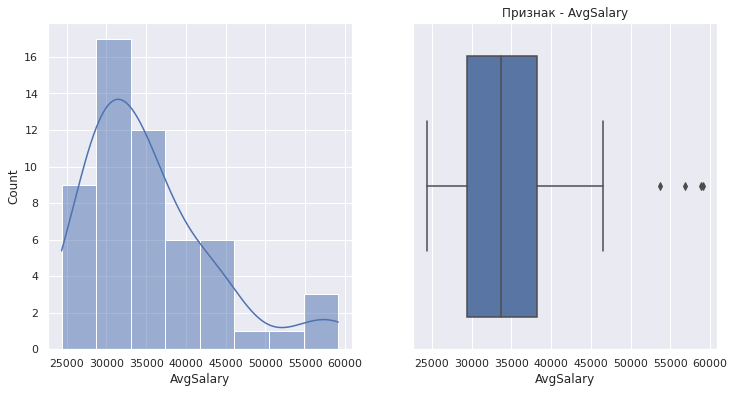

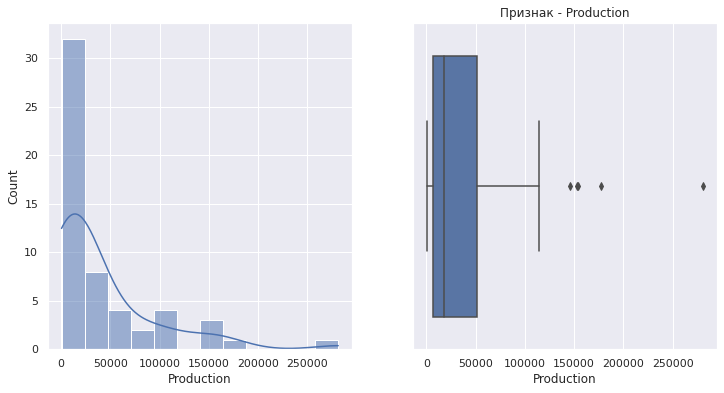

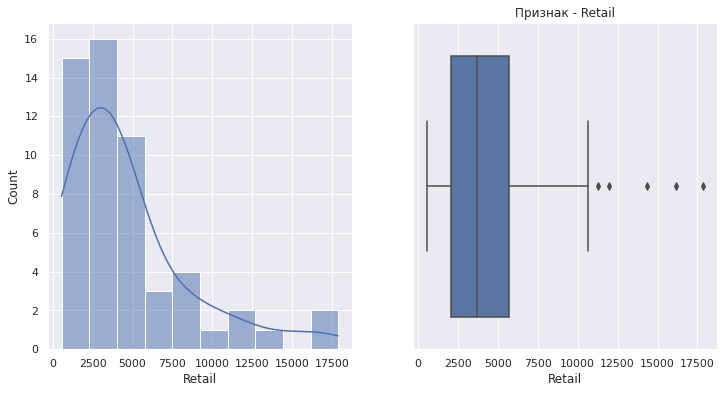

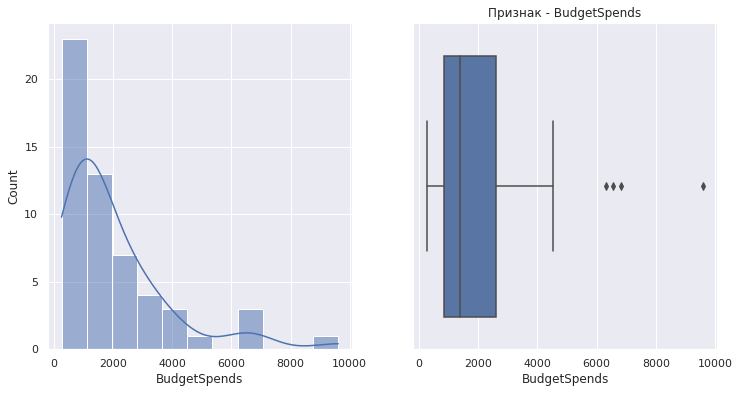

In [268]:
for feat in feature_cols:
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
    plt.title(f'Признак - {feat}')
    sns.histplot(X_train[feat], kde = True, ax = ax1)
    sns.boxplot(X_train[feat], ax = ax2)

# Линейная регрессия

In [269]:
scaler = StandardScaler()

In [270]:
X_train_scaled = scaler.fit_transform(X_train)

In [271]:
X_test_scaled = scaler.transform(X_test)

In [272]:
l_reg = LinearRegression()

In [273]:
l_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [274]:
y_lr = l_reg.predict(X_test_scaled)

In [275]:
r2_score(y_test, y_lr)

0.523258875745827

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


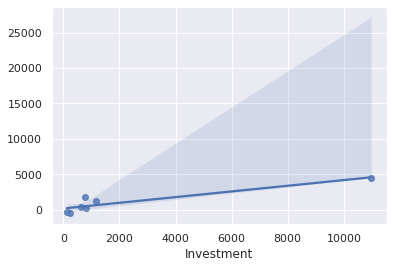

In [276]:
sns.regplot(y_test, y_lr)

# Машина опорных векторов


In [277]:
svr = SVR()

In [278]:
svr.fit(X_train, y_train)

SVR()

In [279]:
y_svr = svr.predict(X_test)

In [280]:
r2_score(y_test, y_svr)

-0.07320185585151107

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


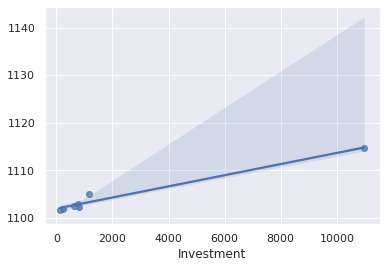

In [281]:
sns.regplot(y_test, y_svr)

# Градиентый бустинг

In [282]:
lgbm = LGBMRegressor()

In [283]:
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [284]:
y_lgbm = lgbm.predict(X_test)

In [285]:
r2_score(y_test, y_lgbm)

0.7358704603195617

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


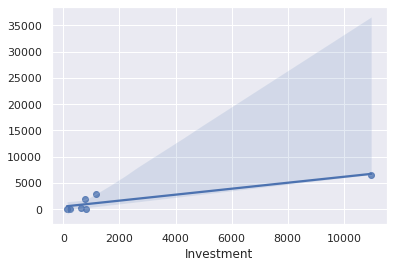

In [286]:
sns.regplot(y_test, y_lgbm)

In [308]:
mean_absolute_error(y_test, y_lgbm)

1238.847431395318

In [309]:
with open('/content/lgbm_model.dill', 'wb') as f:
    dill.dump(lgbm, f)

In [287]:
cv_params = {'n_estimators': [ 2, 5, 10, 15, 50, 80, 100, 120, 200], 
             'reg_alpha': [0.0, 0.1, 0.25, 0.5, 1.1, 1.25, 2.5]}

In [288]:
cv_search = GridSearchCV(LGBMRegressor(), param_grid = cv_params,
                         scoring = 'r2')

In [289]:
cv_search.fit(X_train, y_train)

GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'n_estimators': [2, 5, 10, 15, 50, 80, 100, 120, 200],
                         'reg_alpha': [0.0, 0.1, 0.25, 0.5, 1.1, 1.25, 2.5]},
             scoring='r2')

In [290]:
cv_search.best_params_

{'n_estimators': 10, 'reg_alpha': 2.5}

In [291]:
cv_search.best_score_

0.08211456755318516

In [303]:
lgbm2 = LGBMRegressor(n_estimators = 10, reg_alpha = 2.5)

In [304]:
lgbm2.fit(X_train, y_train)

LGBMRegressor(n_estimators=10, reg_alpha=2.5)

In [305]:
y_lgbm2 = lgbm2.predict(X_test)

In [306]:
r2_score(y_test, y_lgbm2)

0.5655170539096046

In [307]:
mean_absolute_error(y_test, y_lgbm2)

1935.6881123289952

# Cнижение количества факторов

In [297]:
feats = ['WorkCount', 'AvgSalary', 'Production']

In [298]:
l_reg2 = LinearRegression()

In [299]:
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = feature_cols)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns = feature_cols)

In [300]:
l_reg2.fit(X_train_scaled[feats], y_train)

LinearRegression()

In [301]:
y_lreg2 = l_reg2.predict(X_test_scaled[feats])

In [302]:
r2_score(y_test, y_lreg2)

0.5013688996994634

# Использование модели

In [311]:
lgbm_model = None

In [313]:
!wget -O /content/lgbm_model.dill https://github.com/Segrey372017/cities_stat/raw/main/lgbm_model.dill

--2022-08-11 11:33:41--  https://github.com/Segrey372017/cities_stat/raw/main/lgbm_model.dill
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Segrey372017/cities_stat/main/lgbm_model.dill [following]
--2022-08-11 11:33:42--  https://raw.githubusercontent.com/Segrey372017/cities_stat/main/lgbm_model.dill
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30817 (30K) [application/octet-stream]
Saving to: ‘/content/lgbm_model.dill’

/content/lgbm_model 100%[===================>]  30.09K  --.-KB/s    in 0.003s  

2022-08-11 11:33:42 (9.66 MB/s) - ‘/content/lgbm_model.dill’ saved [30817/30817]



In [314]:
with open('/content/lgbm_model.dill', 'rb') as f:
    lgbm_model = dill.load(f)

In [317]:
dx = pd.DataFrame({'WorkCount': 10799, 'AvgSalary': 27948.6 , 'Production': 10747.8904 , 'Retail': 5659.9845 , 'BudgetSpends': 1433.7492}, 
                  index = [0])

In [320]:
 dx

,WorkCount,AvgSalary,Production,Retail,BudgetSpends
0,10799,27948.6,10747.8904,5659.9845,1433.7492


In [321]:
lgbm_model.predict(dx)

array([3214.17987907])